### Exercise 1: MSE Scikit-learn

In [1]:
from sklearn.metrics import mean_squared_error

##### 1. Compute the MSE using sklearn.metrics on y_true and y_pred below

In [2]:
y_true = [91, 51, 2.5, 2, -5]
y_pred = [90, 48, 2, 2, -4]

mean_squared_error(y_pred=y_pred,y_true=y_true)

2.25

### Exercise 2: Accuracy Scikit-learn

##### 1. Compute the accuracy using sklearn.metrics on y_true and y_pred below:

In [5]:
from sklearn.metrics import accuracy_score
y_pred = [0, 1, 0, 1, 0, 1, 0]
y_true = [0, 0, 1, 1, 1, 1, 0]


accuracy_score(y_true=y_true,y_pred=y_pred)

0.5714285714285714

### Exercise 3: Regression

In [7]:
# imports
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# data
housing = fetch_california_housing()
X, y = housing['data'], housing['target']
# split data train test
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.1,shuffle=True,random_state=13)
# pipeline
pipeline = [('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('lr', LinearRegression())]
pipe = Pipeline(pipeline)
# fit
pipe.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('lr', LinearRegression())])

##### 1. Predict on the train set and test set

In [13]:
train_pred = pipe.predict(X_train)
test_pred = pipe.predict(X_test)

train_pred[:10],test_pred[:10]

(array([1.54505951, 2.21338527, 2.2636205 , 3.3258957 , 1.51710076,
        1.63209319, 2.9265211 , 0.78080924, 1.21968217, 0.72656239]),
 array([ 1.82212706,  1.98357668,  0.80547979, -0.19259114,  1.76072418,
         3.27855815,  2.12056804,  1.96099917,  2.38239663,  1.21005304]))

##### 2. Compute R2, Mean Square Error, Mean Absolute Error on both train and test set

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error
train_r2 = r2_score(y_pred=train_pred,y_true=y_train)
test_r2 = r2_score(y_pred=test_pred,y_true=y_test)

train_mse = mean_squared_error(y_pred=train_pred,y_true=y_train)
test_mse = mean_squared_error(y_pred=test_pred,y_true=y_test)

train_mae = mean_absolute_error(y_pred=train_pred,y_true=y_train)
test_mae = mean_absolute_error(y_pred=test_pred,y_true=y_test)


print(f"""
r2 on the train set: {train_r2}
MAE on the train set:  {train_mae}
MSE on the train set:  {train_mse}

r2 on the test set:  {test_r2}
MAE on the test set:  {test_mae}
MSE on the test set:  {test_mse}
""")


r2 on the train set: 0.6079874818809448
MAE on the train set:  0.5300159371615256
MSE on the train set:  0.5210784446797679

r2 on the test set:  0.5903435927516573
MAE on the test set:  0.5454023699809114
MSE on the test set:  0.5537420654727399



### Exercise 4: Classification

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X , y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=43)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

##### 1. Predict on the train set and test set

In [25]:
X_test_scaled = scaler.transform(X_test)
train_pred = classifier.predict(X_train_scaled)
test_pred = classifier.predict(X_test_scaled)

train_pred[:10],test_pred[:10]

(array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0]), array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0]))

##### 2. Compute F1, accuracy, precision, recall, roc_auc scores on the train set and test set. Print the confusion matrix on the test set results.

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_roc_auc = roc_auc_score(y_train, classifier.predict_proba(X_train_scaled)[:, 1])

test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test_scaled)[:, 1])

print("Train Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"ROC AUC Score: {train_roc_auc}")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"ROC AUC Score: {test_roc_auc}")

print("\nTest Set Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))



Train Set Metrics:
Accuracy: 0.989010989010989
F1 Score: 0.9911504424778761
Precision: 0.9893992932862191
Recall: 0.9929078014184397
ROC AUC Score: 0.9990161111794368

Test Set Metrics:
Accuracy: 0.9736842105263158
F1 Score: 0.9801324503311258
Precision: 0.9736842105263158
Recall: 0.9866666666666667
ROC AUC Score: 0.9863247863247864

Test Set Confusion Matrix:
[[37  2]
 [ 1 74]]


##### 3. Plot the AUC curve for on the test set using roc_curve of scikit learn.

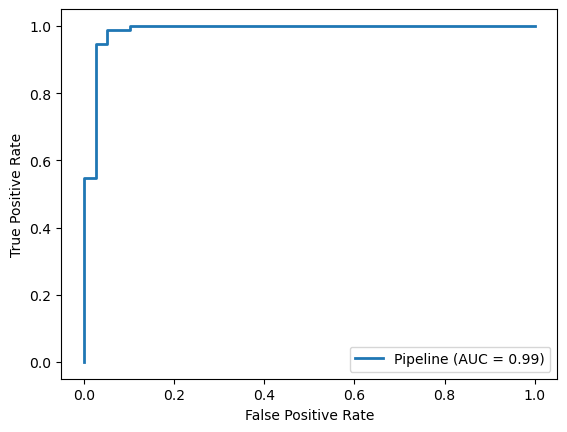

In [35]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(fpr, tpr,  lw=2, label='Pipeline (AUC = %0.2f)' % test_roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


### Exercise 5: Machine Learning models

In [38]:
# imports
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# data
housing = fetch_california_housing()
X, y = housing['data'], housing['target']
# split data train test
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.1,shuffle=True,random_state=43)
# pipeline
pipeline = [('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('lr', LinearRegression())]
pipe = Pipeline(pipeline)
# fit
pipe.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('lr', LinearRegression())])

##### 1. Create 5 pipelines with 5 different models as final estimator (keep the imputer and scaler unchanged): 

In [44]:
from sklearn.svm import LinearSVR

svm_pipeline = [('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('ls', LinearSVR())]
svm_pipe = Pipeline(svm_pipeline)
svm_pipe.fit(X_train, y_train)



/home/zenitsu/anaconda3/envs/ex00/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/zenitsu/anaconda3/envs/ex00/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('ls', LinearSVR())])

In [45]:
from sklearn.tree import DecisionTreeRegressor
dts_pipeline = [('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('dt', DecisionTreeRegressor(random_state=43))]
dts_pipe = Pipeline(dts_pipeline)
dts_pipe.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('dt', DecisionTreeRegressor(random_state=43))])

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_pipeline = [('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('rf', RandomForestRegressor(random_state=43))]
rf_pipe = Pipeline(rf_pipeline)
rf_pipe.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('dt', RandomForestRegressor())])

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gb_pipeline = [('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('gb', GradientBoostingRegressor(random_state=43))]
gb_pipe = Pipeline(gb_pipeline)
gb_pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('gb', GradientBoostingRegressor(random_state=43))])

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# LR
y_train_pred_lr = pipe.predict(X_train)
y_test_pred_lr = pipe.predict(X_test)
print("LR Train R2:", r2_score(y_train, y_train_pred_lr))
print("LR Train MSE:", mean_squared_error(y_train, y_train_pred_lr))
print("LR Train MAE:", mean_absolute_error(y_train, y_train_pred_lr))
print("LR Test R2:", r2_score(y_test, y_test_pred_lr))
print("LR Test MSE:", mean_squared_error(y_test, y_test_pred_lr))
print("LR Test MAE:", mean_absolute_error(y_test, y_test_pred_lr))


# SVM
y_train_pred_svm = svm_pipe.predict(X_train)
y_test_pred_svm = svm_pipe.predict(X_test)
print("SVM Train R2:", r2_score(y_train, y_train_pred_svm))
print("SVM Train MSE:", mean_squared_error(y_train, y_train_pred_svm))
print("SVM Train MAE:", mean_absolute_error(y_train, y_train_pred_svm))
print("SVM Test R2:", r2_score(y_test, y_test_pred_svm))
print("SVM Test MSE:", mean_squared_error(y_test, y_test_pred_svm))
print("SVM Test MAE:", mean_absolute_error(y_test, y_test_pred_svm))

# Decision Tree
y_train_pred_dts = dts_pipe.predict(X_train)
y_test_pred_dts = dts_pipe.predict(X_test)
print("Decision Tree Train R2:", r2_score(y_train, y_train_pred_dts))
print("Decision Tree Train MSE:", mean_squared_error(y_train, y_train_pred_dts))
print("Decision Tree Train MAE:", mean_absolute_error(y_train, y_train_pred_dts))
print("Decision Tree Test R2:", r2_score(y_test, y_test_pred_dts))
print("Decision Tree Test MSE:", mean_squared_error(y_test, y_test_pred_dts))
print("Decision Tree Test MAE:", mean_absolute_error(y_test, y_test_pred_dts))

# Random Forest
y_train_pred_rf = rf_pipe.predict(X_train)
y_test_pred_rf = rf_pipe.predict(X_test)
print("Random Forest Train R2:", r2_score(y_train, y_train_pred_rf))
print("Random Forest Train MSE:", mean_squared_error(y_train, y_train_pred_rf))
print("Random Forest Train MAE:", mean_absolute_error(y_train, y_train_pred_rf))
print("Random Forest Test R2:", r2_score(y_test, y_test_pred_rf))
print("Random Forest Test MSE:", mean_squared_error(y_test, y_test_pred_rf))
print("Random Forest Test MAE:", mean_absolute_error(y_test, y_test_pred_rf))

# Gradient Boosting
y_train_pred_gb = gb_pipe.predict(X_train)
y_test_pred_gb = gb_pipe.predict(X_test)
print("Gradient Boosting Train R2:", r2_score(y_train, y_train_pred_gb))
print("Gradient Boosting Train MSE:", mean_squared_error(y_train, y_train_pred_gb))
print("Gradient Boosting Train MAE:", mean_absolute_error(y_train, y_train_pred_gb))
print("Gradient Boosting Test R2:", r2_score(y_test, y_test_pred_gb))
print("Gradient Boosting Test MSE:", mean_squared_error(y_test, y_test_pred_gb))
print("Gradient Boosting Test MAE:", mean_absolute_error(y_test, y_test_pred_gb))



LR Train R2: 0.6054131599242079
LR Train MSE: 0.5273648371379568
LR Train MAE: 0.5330920012614552
LR Test R2: 0.6128959462132963
LR Test MSE: 0.49761195027083815
LR Test MAE: 0.5196420310323716
SVM Train R2: 0.05372275260712278
SVM Train MSE: 1.264698402924042
SVM Train MAE: 0.5133493297445385
SVM Test R2: 0.6100116587407838
SVM Test MSE: 0.5013196249911074
SVM Test MAE: 0.4887408363332456
Decision Tree Train R2: 1.0
Decision Tree Train MSE: 9.24499456646287e-32
Decision Tree Train MAE: 4.221907539810565e-17
Decision Tree Test R2: 0.6228217144931267
Decision Tree Test MSE: 0.4848526395290697
Decision Tree Test MAE: 0.4403051356589147
Random Forest Train R2: 0.9740959927021312
Random Forest Train MSE: 0.034620674595323704
Random Forest Train MAE: 0.11978913377476352
Random Forest Test R2: 0.8126174114874822
Random Forest Test MSE: 0.24087532642551382
Random Forest Test MAE: 0.319258545639535
Gradient Boosting Train R2: 0.8042086499063386
Gradient Boosting Train MSE: 0.26167490389525294


### Exercise 6: Grid Search

##### 1. Run a Grid Search with n_jobs set to -1 to parallelize the computations on all CPUs. The hyperparameter to change are: n_estimators, max_depth, min_samples_leaf. It may take

In [49]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV
import numpy as np

X,y = fetch_california_housing(return_X_y=True)

parameters = {'n_estimators':[200, 75, 25],
            'max_depth':[15,5,9],
            'min_samples_leaf': [12,17,40]}

rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters,cv=[(np.arange(18576), np.arange(18576,20640))], n_jobs=-1)
clf.fit(X,y)


GridSearchCV(cv=[(array([    0,     1,     2, ..., 18573, 18574, 18575]),
                  array([18576, 18577, 18578, ..., 20637, 20638, 20639]))],
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [15, 5, 9],
                         'min_samples_leaf': [12, 17, 40],
                         'n_estimators': [200, 75, 25]})

In [50]:
clf.cv_results_

{'mean_fit_time': array([232.20322847,  91.20270228,  32.33867168, 207.04034376,
         82.79390168,  24.23531771, 176.24149489,  65.68605447,
         18.16464305, 111.99869084,  28.83240342,  14.74496555,
        109.60270572,  39.81464529,  15.76626205, 111.08353853,
         40.82230687,  12.37917066, 176.15615845,  67.82924628,
         20.36675262, 181.36324215,  66.61985946,  24.48645616,
        148.05187297,  57.43734121,  22.18121648]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0.54414439, 0.16704726, 0.06488347, 0.42418122, 0.09979153,
        0.01482415, 0.50942087, 0.19002056, 0.01424694, 0.20068359,
        0.05642676, 0.05105662, 0.15396142, 0.06128263, 0.03362799,
        0.23549461, 0.08400512, 0.0391252 , 0.33116531, 0.13064981,
        0.05808282, 0.39735818, 0.19346523, 0.04290557, 0.10466409,
        0.19496441, 0.03201199]),
 'std_score_

##### 2. Write a function that takes as input the Grid Search object and that returns the best model fitted, the best set of hyperparameter and the associated score:

In [52]:
def select_model_verbose(gs:GridSearchCV):
    trained_model = gs.best_estimator_
    best_params = gs.best_params_
    best_score = gs.best_score_
    return trained_model, best_params, best_score


##### 3. Use the trained model to predict on a new point:

In [53]:
new_point = np.array([[3.2031, 52., 5.47761194, 1.07960199, 910., 2.26368159, 37.85, -122.26]])
model, best_params, best_score = select_model_verbose(clf)

model.predict(new_point)

array([2.29826411])